<a href="https://colab.research.google.com/github/AkshithaKola/RNN/blob/main/ai21btech11017_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import torch.optim as optim
import os

Dataset creation

In [ ]:
length=np.random.randint(2,9,7000)
total_set=[]

for j in range(0,7000):
  l=[]
  a=length[j]
  seq1=torch.rand(a,1)
  seq2=torch.zeros(a,1)
  x=random.randint(1,a)
  y=random.randint(1,a)
  while x==y:
    y=random.randint(1,a)
  seq2[x-1]=1
  seq2[y-1]=1
  seq=torch.cat((seq1,seq2),dim=1)
  l.append(seq)
  l.append(seq1[x-1]+seq1[y-1])
  total_set.append(l)
train_set=total_set[0:5000]
test_set=total_set[5000:7000]

no_of_epochs=25


In [ ]:
#baseline predicting sum of 1
loss=0
for i in range(0,5000):
  loss +=((1 - train_set[i][1])**2).sum()
baseline=np.full((no_of_epochs,),loss/5000)

Elman Network

In [ ]:
class elman_network():
  def __init__(self,H):
    #we know that input depth is a constant-->2 and the size of output is-->1
    self.x_size=2
    self.y_size=1
    self.h_size=H

    self.w_xh=torch.rand(H,2,requires_grad=True)
    self.w_hh=torch.rand(H,H,requires_grad=True)
    self.w_yh=torch.rand(1,H,requires_grad=True)

    self.b_h=torch.rand(H,1,requires_grad=True)
    self.b_y=torch.rand(1,1,requires_grad=True)
    self.optimizer = optim.RMSprop([self.w_xh, self.w_hh, self.w_yh, self.b_h, self.b_y], lr=0.01)
  def forward(self,x):
    h=torch.zeros(self.h_size,1)
    a=x.shape[0]

    for i in range(0,a):
      w=torch.matmul(self.w_xh,x[i]).unsqueeze(1)
      y=torch.matmul(self.w_hh,h)
      z=self.b_h
      h=torch.tanh(w+y+z)
    t=torch.matmul(self.w_yh,h)
    y=torch.relu(t+self.b_y)
    return y

  def train(self,x,no_of_epochs):
    with open('elman.txt','w') as f:
      for j in range(0,no_of_epochs):
        epoch_loss=0
        for i in range(0,len(x)):
          y_p=self.forward(x[i][0])
          loss =((y_p - x[i][1])**2).sum()
          epoch_loss +=loss
          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
        a=str(epoch_loss.detach().numpy()/5000)
        f.write(a+'\n')

LSTM

In [ ]:
class LSTM():
  def __init__(self,H,C):
    #we know that input depth is a constant-->2 and the size of output is-->1
    #C is the number of cell states
    self.x_size=2
    self.y_size=1
    self.h_size=H
    self.c_size=C

    self.w_i=torch.rand(C,2+H,requires_grad=True)
    self.w_f=torch.rand(C,2+H,requires_grad=True)
    self.w_o=torch.rand(C,2+H,requires_grad=True)
    self.w_c=torch.rand(C,2+H,requires_grad=True)
    self.w_y=torch.rand(1,H,requires_grad=True)

    self.b_o=torch.rand(C,1,requires_grad=True)
    self.b_i=torch.rand(C,1,requires_grad=True)
    self.b_f=torch.rand(C,1,requires_grad=True)
    self.b_c=torch.rand(C,1,requires_grad=True)
    self.b_y=torch.rand(1,1,requires_grad=True)
    self.optimizer = optim.RMSprop([self.w_i, self.w_f, self.w_o,self.w_c,self.w_y,self.b_o,self.b_i,self.b_f,self.b_c, self.b_y], lr=0.01)
  def forward(self,x):
    h=torch.zeros(self.h_size,1)
    c=torch.zeros(self.c_size,1)
    a=x.shape[0]
    for j in range(0,a):
      merge=torch.cat((h,x[j].unsqueeze(1)),dim=0)
      f=torch.sigmoid(torch.matmul(self.w_f,merge)+self.b_f)
      i=torch.sigmoid(torch.matmul(self.w_i,merge)+self.b_i)
      g=torch.tanh(torch.matmul(self.w_c,merge)+self.b_c)
      c=f*c+i*g
      o=torch.sigmoid(torch.matmul(self.w_o,merge)+self.b_o)
      h=o*torch.tanh(c)
    t=torch.matmul(self.w_y,h)
    y=torch.relu(t+self.b_y)
    return y

  def train(self,x,no_of_epochs):
    with open('lstm.txt','w') as f:
      for j in range(0,no_of_epochs):
        epoch_loss=0
        for i in range(0,len(x)):
          y_p=self.forward(x[i][0])
          loss =((y_p - x[i][1])**2).sum()
          epoch_loss +=loss
          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
        a=str(epoch_loss.detach().numpy()/5000)
        f.write(a+'\n')


GRU

In [ ]:
class GRU():
  def __init__(self,H):
    #we know that input depth is a constant-->2 and the size of output is-->1
    self.x_size=2
    self.y_size=1
    self.h_size=H

    self.w_z=torch.rand(H,2+H,requires_grad=True)
    self.w_r=torch.rand(H,2+H,requires_grad=True)
    self.w=torch.rand(H,2+H,requires_grad=True)
    self.w_y=torch.rand(1,H,requires_grad=True)

    self.b_y=torch.rand(1,1,requires_grad=True)
    self.optimizer = optim.RMSprop([self.w_z, self.w_r, self.w,self.w_y,self.b_y], lr=0.01)
  def forward(self,x):
    h=torch.zeros(self.h_size,1)
    a=x.shape[0]
    ones_vec=torch.ones(self.h_size,1)
    for j in range(0,a):
      merge1=torch.cat((h,x[j].unsqueeze(1)),dim=0)
      z=torch.sigmoid(torch.matmul(self.w_z,merge1))
      r=torch.sigmoid(torch.matmul(self.w_r,merge1))
      merge2=torch.cat((r*h,x[j].unsqueeze(1)),dim=0)
      g=torch.tanh(torch.matmul(self.w,merge2))
      h=(ones_vec-z)*h+z*g
    t=torch.matmul(self.w_y,h)
    y=torch.relu(t+self.b_y)
    return y

  def train(self,x,no_of_epochs):
    with open('gru.txt','w') as f:
      for j in range(0,no_of_epochs):
        epoch_loss=0
        for i in range(0,len(x)):
          y_p=self.forward(x[i][0])
          loss =((y_p - x[i][1])**2).sum()
          epoch_loss +=loss
          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
        a=str(epoch_loss.detach().numpy()/5000)
        f.write(a+'\n')

In [ ]:
gru=GRU(3)
gru.train(train_set,no_of_epochs)

In [ ]:
elman=elman_network(3)
elman.train(train_set,no_of_epochs)

In [ ]:
lstm=LSTM(3,3)
lstm.train(train_set,no_of_epochs)

In [ ]:
elman_loss=0
for i in range(0,len(test_set)):
  y=elman.forward(test_set[i][0])
  elman_loss +=((y-test_set[i][1])**2).sum()
elman_loss=elman_loss/len(test_set)

In [ ]:
lstm_loss=0
for i in range(0,len(test_set)):
  y=lstm.forward(test_set[i][0])
  lstm_loss +=((y-test_set[i][1])**2).sum()
lstm_loss=lstm_loss/len(test_set)

In [ ]:
gru_loss=0
for i in range(0,len(test_set)):
  y=gru.forward(test_set[i][0])
  gru_loss +=((y-test_set[i][1])**2).sum()
gru_loss=gru_loss/len(test_set)

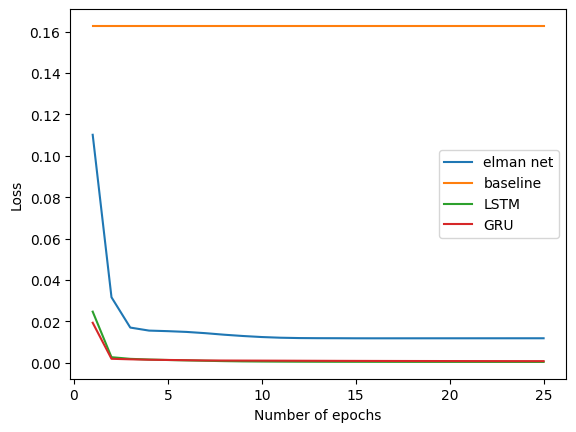

In [ ]:
x_axis=np.linspace(1,25,25)
y1=np.loadtxt('elman.txt')
y2=baseline
y3=np.loadtxt('lstm.txt')
y4=np.loadtxt('gru.txt')
plt.plot(x_axis, y1,label='elman net')
plt.plot(x_axis, y2,label='baseline')
plt.plot(x_axis, y3,label='LSTM')
plt.plot(x_axis, y4,label='GRU')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

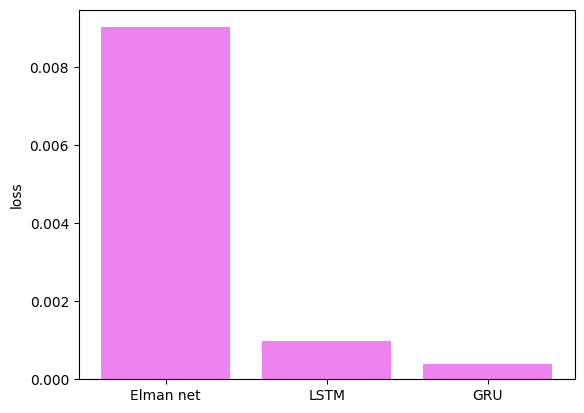

In [ ]:
x1=['Elman net','LSTM','GRU']
y1=[elman_loss.detach().numpy(),lstm_loss.detach().numpy(),gru_loss.detach().numpy()]

plt.bar(x1,y1,color='violet')
plt.ylabel('loss')
plt.show()

In [ ]:
os.remove('/content/elman.txt')
os.remove('/content/gru.txt')
os.remove('/content/lstm.txt')